In [1]:
#importing libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import MultinomialNB
import requests,json
import pickle
import shap

import os
print(os.listdir("./"))

['.DS_Store', 'Email_spam_filtering.py', 'Spam_filtering.ipynb', '.ipynb_checkpoints', 'countvect', 'model_file']


In [2]:
import scikitplot as skplt

In [3]:
#reading the dataset 

df = pd.read_csv('https://mldataset0123.s3.amazonaws.com/spam.csv',encoding='latin-1')
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df.columns=['label','text']
df.head(5)


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df_labels=df.pop('label')
df_labels.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: label, dtype: object

In [5]:
!pip install imblearn 


In [6]:
# import imblearn

In [7]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

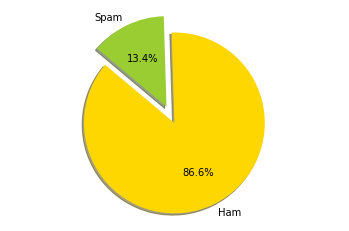

In [8]:
#plotting ham and spam data % in pie chart 
count_Class=pd.value_counts(df_labels, sort= True)

# Data to plot
labels = 'Ham', 'Spam'
sizes = [count_Class[0], count_Class[1]]
colors = ['gold', 'yellowgreen'] # 'lightcoral', 'lightskyblue'
explode = (0.1, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [9]:
#splitting the test and train data 
trainset, testset, trainlabel, testlabel = train_test_split(df, df_labels, test_size=0.33, random_state=42)

In [10]:
#extracting n-grams from the text data
countvect= CountVectorizer(ngram_range=(2,2),)
x_counts = countvect.fit(trainset.text)
#preparing for training set
x_train_df =countvect.transform(trainset.text)
#preparing for test set
x_test_df = countvect.transform(testset.text)

In [11]:
X_resampled, y_resampled = smote.fit_sample(x_train_df,trainlabel)

In [12]:
#Creating the model using naive bayes
clf=MultinomialNB()
clf.fit(X_resampled,y_resampled)



MultinomialNB()

In [13]:
#Prediction 
predicted_values = clf.predict(x_test_df)
print(predicted_values[2])

spam


In [14]:
#Metrics about the model 
predictions=dict()
acurracy = accuracy_score(testlabel,predicted_values)
predictions['Naive Bayes']=acurracy*100
confusionmatrix = confusion_matrix(testlabel,predicted_values)
print("The accuracy of the model is {}%".format(acurracy*100 ))
print(confusionmatrix)

The accuracy of the model is 96.08482871125612%
[[1539   48]
 [  24  228]]


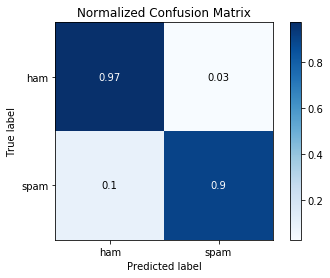

In [15]:

#sns.heatmap(confusionmatrix/np.sum(confusionmatrix),fmt='.2%',cmap='Blues',annot=True)
skplt.metrics.plot_confusion_matrix(testlabel,predicted_values, normalize=True)

In [16]:
def prepareword(word):
    trans_word=countvect.transform(word)
    return trans_word

sent = ['Is there any annual fee I have to pay to Best Buy']
sent=prepareword(sent)
print(sent)
print(clf.predict(sent))

  (0, 10946)	1
  (0, 12971)	1
  (0, 25081)	1
  (0, 26082)	1
['ham']


In [17]:
#serializing the model 
pickle.dump(clf,open('model_file',"wb"))
pickle.dump(countvect,open('countvect','wb'))
print(testset.text[[1044]])

1044    We know someone who you know that fancies you....
Name: text, dtype: object


In [18]:
#loading the serialzied model
ser_clf = pickle.load(open('model_file','rb'))
ser_countvect =pickle.load(open('countvect','rb'))

#loading the serialized joblib model 
# ser_clf = joblib.load('model.pkl')
# ser_countvect=joblib.load('countvect.pkl')
#testing the loaded model 
word = ['green_tea']
x_count = ser_countvect.transform(word)
x_count_f=prepareword(word)

ser_clf.predict(x_count[0])

array(['ham'], dtype='<U4')

In [22]:
# url= 'http://localhost:5004/api'
# data = json.dumps(['Congratulations ur awarded either å£500 of CD '])
# r=requests.post(url,data)
# result = r.json()
# print(result['results'])

In [23]:
! pip install transformers

     |████████████████████████████████| 3.4 MB 1.3 MB/s            
     |████████████████████████████████| 895 kB 14.1 MB/s            
     |████████████████████████████████| 61 kB 1.5 MB/s             
     |████████████████████████████████| 2.2 MB 45.0 MB/s            


In [27]:
rf_shap_values = shap.KernelExplainer(clf.predict,x_test_df)



W0105 14:00:30.205960 4604175872 _kernel.py:80] Using 1839 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


TypeError: ufunc 'multiply' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')

In [25]:
# import transformers

# model = transformers.pipeline('sentiment-analysis', return_all_scores=True)

# explainer = shap.Explainer(model) 
# shap_values = explainer(["What a great movie! ...if you have no taste."])

# # visualize the prediction
# shap.plots.text(shap_values[0, :, "POSITIVE"])